In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

!pip install idx2numpy

import tensorflow.keras as keras
import tensorflow as tf
import idx2numpy
import cv2 as cv
import numpy as np
import gzip
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

train_data_path = '/content/gdrive/My Drive/data4/train-images-idx3-ubyte.gz'
test_data_path = '/content/gdrive/My Drive/data4/t10k-images-idx3-ubyte.gz'
train_label_path = '/content/gdrive/My Drive/data4/train-labels-idx1-ubyte.gz'
test_label_path = '/content/gdrive/My Drive/data4/t10k-labels-idx1-ubyte.gz'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
  Created wheel for idx2numpy: filename=idx2numpy-1.2.2-cp36-none-any.whl size=8032 sha256=2fac413f082a8ad63f9f37edc85faeba6ee3558ad9832c6bb3d4723ac660f57e
  Stored in directory: /root/.cache/pip/wheels/7a/b5/69/3e0757b3086607e95db70661798fdf98a77a0bb79c54e1f320
Successfully built idx2numpy


In [0]:
class MiniBatch_GD():

	def __init__(self):
		self.network = keras.Sequential()
		self.network.add(keras.layers.Conv2D(32, kernel_size=3, kernel_regularizer=keras.regularizers.l2(0.01), bias_regularizer=keras.regularizers.l2(0.01), input_shape=(28,28,1)))
		self.network.add(keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None))
		self.network.add(keras.layers.BatchNormalization())
		self.network.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
		self.network.add(keras.layers.Dropout(0.1))
		self.network.add(keras.layers.Conv2D(64, kernel_size=3, kernel_regularizer=keras.regularizers.l2(0.01), bias_regularizer=keras.regularizers.l2(0.01)))
		self.network.add(keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None))
		self.network.add(keras.layers.BatchNormalization())
		self.network.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
		self.network.add(keras.layers.Dropout(0.3))
		self.network.add(keras.layers.Flatten())
		self.network.add(keras.layers.Dense(10, activation='softmax'))


	def extract_data(self, filepath, num_img):
		with gzip.open(filepath) as f:
			f.read(16)
			buf = f.read(28 * 28 * num_img)
			train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
			train_data = train_data.reshape(num_img, 28, 28, 1)
			return train_data

	def extract_labels(self, filepath, num_img):
		with gzip.open(filepath) as f:
			f.read(8)
			buf = f.read(num_img)
			labels= np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
			# labels = labels.reshape(num_img, 28, 28, 1)
			return labels


In [4]:
mbgd = MiniBatch_GD()

train_data = mbgd.extract_data(train_data_path, 60000)
train_labels = mbgd.extract_labels(train_label_path, 60000)
test_data = mbgd.extract_data(test_data_path, 10000)
test_labels = mbgd.extract_labels(test_label_path, 10000)



Fd =open('/content/gdrive/My Drive/data4/Network_Best_one.h5', 'w+') 
Fd.close()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)
opt = keras.optimizers.SGD(lr = 0.001 , momentum = 0.9)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10 )
cs= ModelCheckpoint(filepath='/content/gdrive/My Drive/data4/Network_Best_one.h5', monitor='val_loss', save_best_only=True)
mbgd.network.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist = mbgd.network.fit(train_data, train_labels, batch_size = 170, validation_data=(test_data, test_labels), epochs=300, callbacks = [es,cs])
mbgd.network.save('/content/gdrive/My Drive/data4/Network_config_four.h5')
with open('/content/gdrive/My Drive/data4/History_config_four', 'wb') as file:
  pickle.dump(hist.history, file)


Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 12s 203us/sample - loss: 1.1278 - acc: 0.7637 - val_loss: 0.8353 - val_acc: 0.8424
Epoch 2/300
60000/60000 [==============================] - 6s 94us/sample - loss: 0.8317 - acc: 0.8373 - val_loss: 0.7416 - val_acc: 0.8556
Epoch 3/300
60000/60000 [==============================] - 6s 95us/sample - loss: 0.7365 - acc: 0.8532 - val_loss: 0.6561 - val_acc: 0.8724
Epoch 4/300
60000/60000 [==============================] - 6s 95us/sample - loss: 0.6609 - acc: 0.8634 - val_loss: 0.6238 - val_acc: 0.8700
Epoch 5/300
60000/60000 [==============================] - 6s 94us/sample - loss: 0.6075 - acc: 0.8713 - val_loss: 0.5494 - val_acc: 0.8850
Epoch 6/300
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5586 - acc: 0.8775 - val_loss: 0.5236 - val_acc: 0.8839
Epoch 7/300
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5213 - acc: 0.8817 - val

OUTPUT FROM BEST MODEL
10000/10000 - 1s - loss: 0.2820 - acc: 0.9099


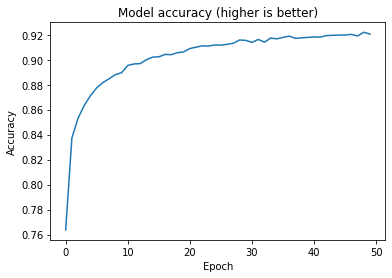

In [6]:

print("OUTPUT FROM BEST MODEL")
#Bestmodel = MiniBatch_GD()
mbgd.network.load_weights('/content/gdrive/My Drive/data4/Network_Best_one.h5')
oss, acc = mbgd.network.evaluate(test_data,  test_labels, verbose=2)



import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.title('Model accuracy (higher is better)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()